In [1]:
import desitarget 
from desitarget.targets import desi_mask, bgs_mask, mws_mask

from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['font.size'] = 15

In [2]:
! ls /global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS*.ran.fits

/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_0_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_10_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_11_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_12_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_13_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_14_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_15_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_16_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_17_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_1_clustering.r

In [3]:
N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits')
S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits')
N['APPLIM'] = 19.539993
S['APPLIM'] = 19.5
N8 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_6_clustering.ran.fits')
S8 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_S_6_clustering.ran.fits')
N8['APPLIM'] = 19.539993
S8['APPLIM'] = 19.5

In [4]:
data = Table(np.hstack((N,S))) #BGS ANY in N, S combined
data['ZLIM_UPPER'] = 0.6
ran = Table(np.hstack((N8,S8)))
ran['ZLIM_UPPER'] = 0.6

In [5]:
data

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,WEIGHT_ZFAIL,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP,APPLIM,ZLIM_UPPER
float64,float64,int64,int64,bytes43,float64,float64,float64,float64,float64,int64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
191.20458196461243,60.31535787110577,39633390185481345,1,100,0.08969256109731599,0.64,3.0,1.613220114177946,1.0,-1 .. -1,1.0,1.0,1.0,11.618794,18.39226,20.892622,13.421043,9.27371,0.5107507237961553,-0.10918667636401896,-0.12125347071681446,0.09189331428141073,0.11205224487489494,0.47852499884987515,-0.08700178426439652,-0.08700178426439652,-17.752532357564764,0.04785387196770399,0.0030775738791196166,19.539993,0.6
187.04622815471808,60.82670180284912,39633396124617897,1,100,0.37400455377945924,0.64,3.0,1.6801915534232357,1.0,-1 .. -1,1.0,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.8657535543881233,0.2757199965785285,0.9570932122099367,0.5034037640174682,1.319054690619937,0.7314758434170625,-0.36278441716607546,-0.36278441716607546,-21.20717884549835,0.0009571040215082368,0.13371119385114222,19.539993,0.6
187.83760708675698,60.38987543677365,39633393155049303,1,100,0.1731108191825362,0.64,3.0,1.7267282368438097,0.5,-6539912815536352385 .. 9025372152329235987,0.546875,1.0,1.8169014084507042,13.26433,27.728409,46.020153,37.03337,25.867756,0.6595463164766608,-0.04866411688213576,0.09238961852108621,0.17196093424278175,0.3785062363399163,0.5940547497827482,-0.16791749460706012,-0.16791749460706012,-19.719994580683654,0.012707690463455164,0.01149153305805754,19.539993,0.6
187.05117249536465,62.614542270156655,39633416324383107,1,100,0.2703579310142208,0.64,3.0,1.5579854421783794,1.0,-1 .. -1,1.0,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,0.9961770755006489,0.146409873660811,0.6534524026523496,0.3797334250181883,1.0502045184025013,0.8327485111078745,-0.2622471930837942,-0.2622471930837942,-20.42505494547267,0.004053776360776892,0.035160847734210195,19.539993,0.6
191.14757099005186,60.345815959235,39633390185480938,1,100,0.2819459922463374,0.64,3.0,1.5743490921284766,0.5,-8790991219464744880 .. -4387867067969646830,0.3203125,1.0,3.0714285714285716,6.782468,16.732075,29.996437,31.939342,25.343126,0.6031055527358372,-0.0007029256786438565,0.3765973290806362,0.21603985022885944,0.6418090846178732,0.5546365731061034,-0.27348761247894726,-0.27348761247894726,-20.30376568408361,0.004053776360776892,0.035160847734210195,19.539993,0.6
186.48359894373857,61.73967570511937,39633407801558322,1,100,0.08577825488213503,0.64,3.0,1.6169466967221486,1.0,-6189309032222493180 .. 7718245232114193986,0.421875,1.0,2.3454545454545452,15.079609,20.454126,26.065075,13.486019,10.797623,0.34480053237283675,-0.10549431291824019,-0.11931835908501928,0.06879194820524737,0.061135194940372256,0.3386332394709298,-0.08320490723567098,-0.08320490723567098,-17.77278795503906,0.04785387196770399,0.0030775738791196166,19.539993,0.6
189.28672536137475,60.18713259808659,39633390168704731,1,100,0.21452305283357412,0.64,3.0,1.6400346453345047,1.0,2333715480473687758 .. -1431821843982627288,0.4921875,1.0,2.015625,6.3314033,19.638945,38.222126,43.818123,28.204218,0.9059159293142172,0.04341174620827673,0.3665416848139814,0.27036648397159835,0.7431065827594778,0.7563057691320424,-0.2080873612485669,-0.2080873612485669,-19.915113465885533,0.009219810701767882,0.015770253951760238,19.539993,0.6
189.20703625254848,60.13450219401336,39633390168704208,1,100,0.1842724056985206,0.64,3.0,1.6990866107210438,0.5,-1 .. -1,1.0,1.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.7111367437973818,-0.030741839754296674,0.1465510581719544,0.1934014143564434,0.4517835654815496,0.6300474905985266,-0.178

In [6]:
ran

TARGETID,RA,DEC,NTILE,TILES,rosette_number,rosette_r,COMP_TILE,Z,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP,APPLIM,ZLIM_UPPER
int64,float64,float64,int64,bytes43,int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
327863312287006785,216.9505669368649,32.83665012230005,1,205,7,1.7159098576406955,0.36363636363636365,0.058037195420639474,1.0,41.3768,72.240364,103.97108,65.17895,38.40014,0.6545299448500103,-0.14426818118600174,-0.1937413633406994,0.0760147790792072,0.09051652969836627,0.5905550120761535,-0.05629607955802029,-0.05629607955802029,-18.241204253958422,0.0504667514780847,0.0029186997834375608,19.539993,0.6
327863312287007170,217.04188062667046,32.853869940998784,3,205-208-211,7,1.6700134100068058,0.875,0.04109499359364489,1.0,38.163776,53.08381,58.244007,18.476166,12.191661,0.39301325679946025,-0.13296880915345166,-0.16770569876541191,0.04883330016713219,0.027212454531409136,0.3798972128232231,-0.039862143785835545,-0.039862143785835545,-17.15870792654851,0.08453159877481627,0.0017445635962380836,19.539993,0.6
327863312287007429,216.9543855938448,32.860344044018476,1,205,7,1.6929861480069142,0.36363636363636365,0.2547312738226586,1.449438202247191,7.6044707,24.14605,48.97185,102.79459,157.2373,0.8441388688118282,0.07690470269158392,0.48720804884557595,0.30498082111184066,0.8413102230640456,0.7181128130136154,-0.24708933560797883,-0.24708933560797883,-20.554708020855795,0.008313487102263754,0.017459485623234086,19.539993,0.6
327863312287007553,216.92121460847832,32.858788384502965,1,205,7,1.7060637689086933,0.36363636363636365,0.12938351004970874,1.0,42.200848,80.89466,134.94154,125.686966,89.89503,0.6566863269806386,-0.07975581002016272,-0.029944944617988717,0.1406742044650741,0.2551119563892159,0.5920594404586706,-0.1255020047482175,-0.1255020047482175,-20.203351195965105,0.020644622490123412,0.007104943156241312,19.539993,0.6
327863312287007704,217.02343801992163,32.862082069249105,3,205-208-211,7,1.6682923984669504,0.875,0.24766789101626743,1.0,25.377962,63.159103,114.28298,127.51895,91.811424,0.6680309140783809,0.004169525404897123,0.3260868840315944,0.22537318264273368,0.6153473143472625,0.5999741410005492,-0.2402378542857794,-0.2402378542857794,-21.463536341295885,0.00805868242288395,0.018001593335549324,19.539993,0.6
327863312287007790,216.90366048304867,32.87318279309241,1,205,7,1.6994115070035831,0.36363636363636365,0.21138066950398368,1.0,10.583945,34.321796,67.59605,64.33934,43.387146,0.9505396896648338,0.04834146648669088,0.375107379849201,0.2766884546723227,0.7644235070877583,0.7895705506119082,-0.20503924941886417,-0.20503924941886417,-20.493334679402498,0.009219810701767882,0.015770253951760238,19.539993,0.6
327863312287007803,216.91446590206198,32.86992942788931,1,205,7,1.6984171058366966,0.36363636363636365,0.1786741303179005,1.0,25.0926,78.412476,159.2447,158.6827,107.81483,1.006750439760946,0.009355378018452015,0.23970363210516232,0.2438319098591669,0.6381785331053571,0.8427520706014661,-0.17331390640836347,-0.17331390640836347,-20.97711048257448,0.012707690463455164,0.01149153305805754,19.539993,0.6
327863312287007900,217.00535379503114,32.835804151753585,1,211,7,1.6983943650757714,0.45714285714285713,0.17613418899046246,1.0,13.866477,43.370407,87.71438,88.86868,61.98475,1.014984865422912,0.0065737837967138335,0.2296565453269267,0.24194824479658877,0.6294731334877804,0.8505427382619333,-0.1708501633207486,-0.1708501633207486,-20.299463315380656,0.012707690463455164,0.01149153305805754,19.539993,0.6
327863312287007927,217.0573730678553,32.860629972957376,3,205-208-211,7,1.6588971170529,0.875,0.16196100398298324,1.0,24.075481,39.11644,60.215347,26.141436,3.4676836,0.42951376213155995,-0.09582261273224767,0.0016239980609970422,0.09

In [7]:
cosmo = FlatLambdaCDM(H0=100, Om0=0.3)
data['DL'] = cosmo.luminosity_distance(np.array(data['Z']))

In [8]:
data['ABSMAG_LIM'] = data['APPLIM'] - 5*np.log10(data['DL'])-25-data['KCORR_R0P1']-data['EQ_ALL_0P1']

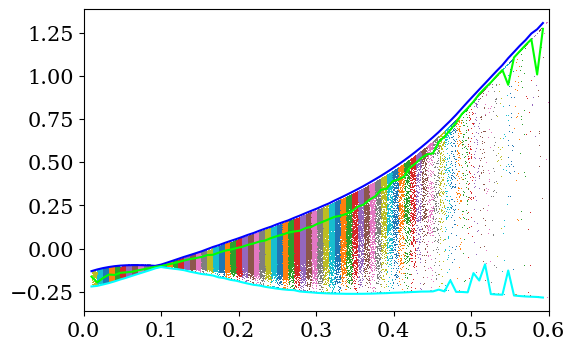

In [9]:
plt.figure(dpi=100)
def find_k(z_range, stat):
    if isinstance(z_range, np.ndarray):
        k = np.empty(len(z_range)-1)
        for i, z in enumerate(z_range):
            if i == len(z_range)-1:
                break
            z_close = np.where(np.logical_and(data['Z'] > (z), data['Z'] < (z_range[i+1])))[0]
            plt.plot(data['Z'][z_close], data['KCORR_R0P1'][z_close], lw=0, marker=',')
            if stat == 'med':
                k[i] = np.median(data['KCORR_R0P1'][z_close])
            elif stat == 'max':
                k[i] = np.amax(data['KCORR_R0P1'][z_close])
            elif stat == 'min':
                k[i] = np.amin(data['KCORR_R0P1'][z_close])
        return k


z_range = np.linspace(0.01,0.6,80)  
M_range = np.arange(-23,-16,0.01)
k_med = find_k(z_range, 'med') 
k_max = find_k(z_range, 'max')
k_min = find_k(z_range, 'min')
plt.plot(z_range[0:-1], k_max, color='blue')
plt.plot(z_range[0:-1], k_med, color='lime')
plt.plot(z_range[0:-1], k_min, color='aqua')

plt.xlim(0,0.6)
plt.show()

In [10]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

Finding linear evolution E(z) from data

In [11]:
z1 = find_nearest(data['Z'], 0.1)
z2 = find_nearest(data['Z'], 0.5)
e_slope = (data['EQ_ALL_0P1'][z2] - data['EQ_ALL_0P1'][z1])/(data['Z'][z2] - data['Z'][z1])
print(data['Z'][z2], data['EQ_ALL_0P1'][z2])
print(data['Z'][z1], data['EQ_ALL_0P1'][z1])
print(e_slope)

e_intercept = data['EQ_ALL_0P1'][z2] - e_slope*data['Z'][z2]
print(e_intercept)
#y = mx+c

0.5000411802639463 -0.48503994485602786
0.10000013207827435 -0.09700012811592612
-0.9699999999999999
-5.551115123125783e-17


Using evolution equation to find limits as function of z

In [12]:
def absmag(appmag, z, k, e):
    return appmag - 5*np.log10(cosmo.luminosity_distance(z).to_value()) -25 - k - e

In [13]:
dl_range = cosmo.luminosity_distance(z_range[0:-1]).to_value()
e_z = e_slope*z_range[0:-1] + e_intercept
faintlim_range_N_max = absmag(19.539993, z_range[0:-1], k_max, e_z)
faintlim_range_S_max = absmag(19.5, z_range[0:-1], k_max, e_z)

faintlim_range_N_min = absmag(19.539993, z_range[0:-1], k_min, e_z)
faintlim_range_S_min = absmag(19.5, z_range[0:-1], k_min, e_z)

faintlim_range_N_med = absmag(19.539993, z_range[0:-1], k_med, e_z)
faintlim_range_S_med = absmag(19.5, z_range[0:-1], k_med, e_z)

brightlim_range_max = absmag(15, z_range[0:-1], k_max, e_z)
brightlim_range_min = absmag(15, z_range[0:-1], k_min, e_z)
brightlim_range_med = absmag(15, z_range[0:-1], k_med, e_z)

In [14]:
def absmag_lim(lim0, lim1, cat):
    return np.where(np.logical_and(cat['ABSMAG_R'] < lim0, cat['ABSMAG_R'] > lim1))

def find_zmax(M):
    z_array = []
    for m in M:
        i = find_nearest(faintlim_range_S_min, m) #ignore faintlim differences between S and N (use 19.5)
        z_array.append(z_range[i])
    return z_array

def redshift_lim_from_k(lim0, lim1, cat):
    N_i = np.where(cat['APPLIM'] == 19.539993)
    S_i = np.where(cat['APPLIM'] == 19.5)
    zlim_upper_S = z_range[find_nearest(faintlim_range_S_max,lim0)]
    zlim_upper_N =  z_range[find_nearest(faintlim_range_N_max,lim0)]
    cat['ZLIM_UPPER'][S_i] = zlim_upper_S
    cat['ZLIM_UPPER'][N_i] = zlim_upper_N

    upper_limed = np.where(cat['Z'] < np.minimum(cat['ZLIM_UPPER'],0.6))
    z_lim_lower = z_range[find_nearest(brightlim_range_min,lim1)]
    return [[zlim_upper_N, zlim_upper_S], z_lim_lower], np.intersect1d(upper_limed, np.where(cat['Z'] > z_lim_lower))

      

print(redshift_lim_from_k(-22,-23, data)[0])

data['ZMAX'] = find_zmax(data['ABSMAG_R'])
data['DL2'] = 10**((19.5 - 25 - data['KCORR_R0P1'] - data['EQ_ALL_0P1'] - data['ABSMAG_R'])/5)

[[0.46556962025316456, 0.4581012658227848], 0.1369620253164557]


plot of corrections and resulting absmag limits, for different k

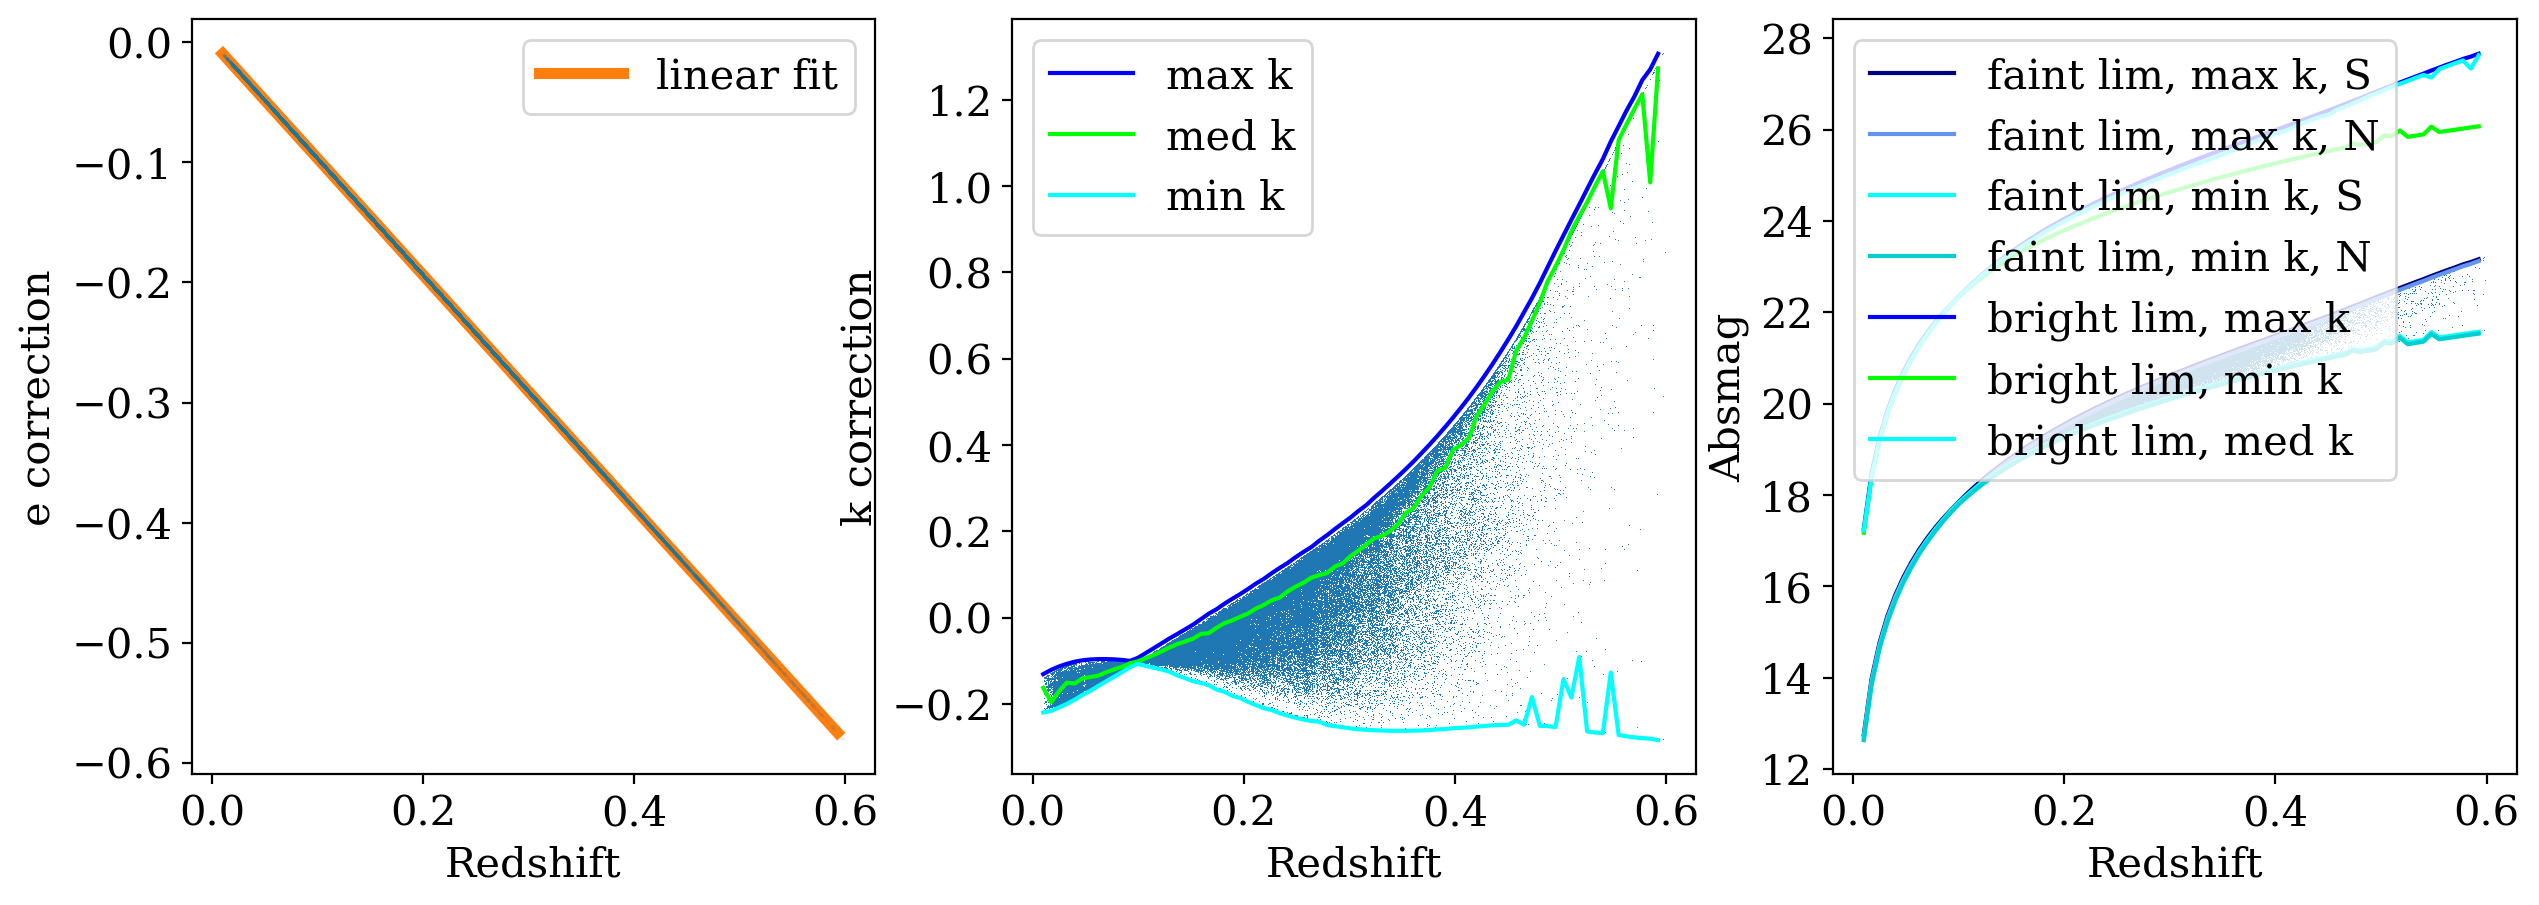

In [15]:
plt.figure(figsize=(15,5), dpi=200)

plt.subplot(131)
plt.plot(z_range[0:-1], e_z, label='linear fit', color='tab:orange', lw=4)
plt.plot(data['Z'], data['EQ_ALL_0P1'], lw=0, marker='o', color='tab:blue', markersize=0.01)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('e correction')

plt.subplot(132)
plt.plot(data['Z'], data['KCORR_R0P1'], lw=0, marker=',')
plt.plot(z_range[0:-1], k_max, color='blue', label='max k')
plt.plot(z_range[0:-1], k_med, color='lime', label='med k')
plt.plot(z_range[0:-1], k_min, color='aqua', label='min k')
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('k correction')

plt.subplot(133)
plt.plot(data['Z'], -data['ABSMAG_LIM'], lw=0, marker=',')
plt.plot(z_range[0:-1], -faintlim_range_S_max, color='navy', label='faint lim, max k, S')
plt.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_med, color='lime', label='med k, S')
#plt.plot(z_range[0:-1], -faintlim_range_N_med, color='palegreen', label='med k, N')
plt.plot(z_range[0:-1], -faintlim_range_S_min, color='aqua', label='faint lim, min k, S')
plt.plot(z_range[0:-1], -faintlim_range_N_min, color='darkturquoise', label='faint lim, min k, N')
plt.plot(z_range[0:-1], -brightlim_range_max, color='blue', label='bright lim, max k')
plt.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.plot(z_range[0:-1], -brightlim_range_med, color='aqua', label='bright lim, med k')

plt.legend()
plt.xlabel('Redshift')
plt.ylabel('Absmag')
plt.savefig('../figures/week8/sv3_bright_corrections_and_absmag.png')


Plot of all data, the lims, and resulting volume-limited bins

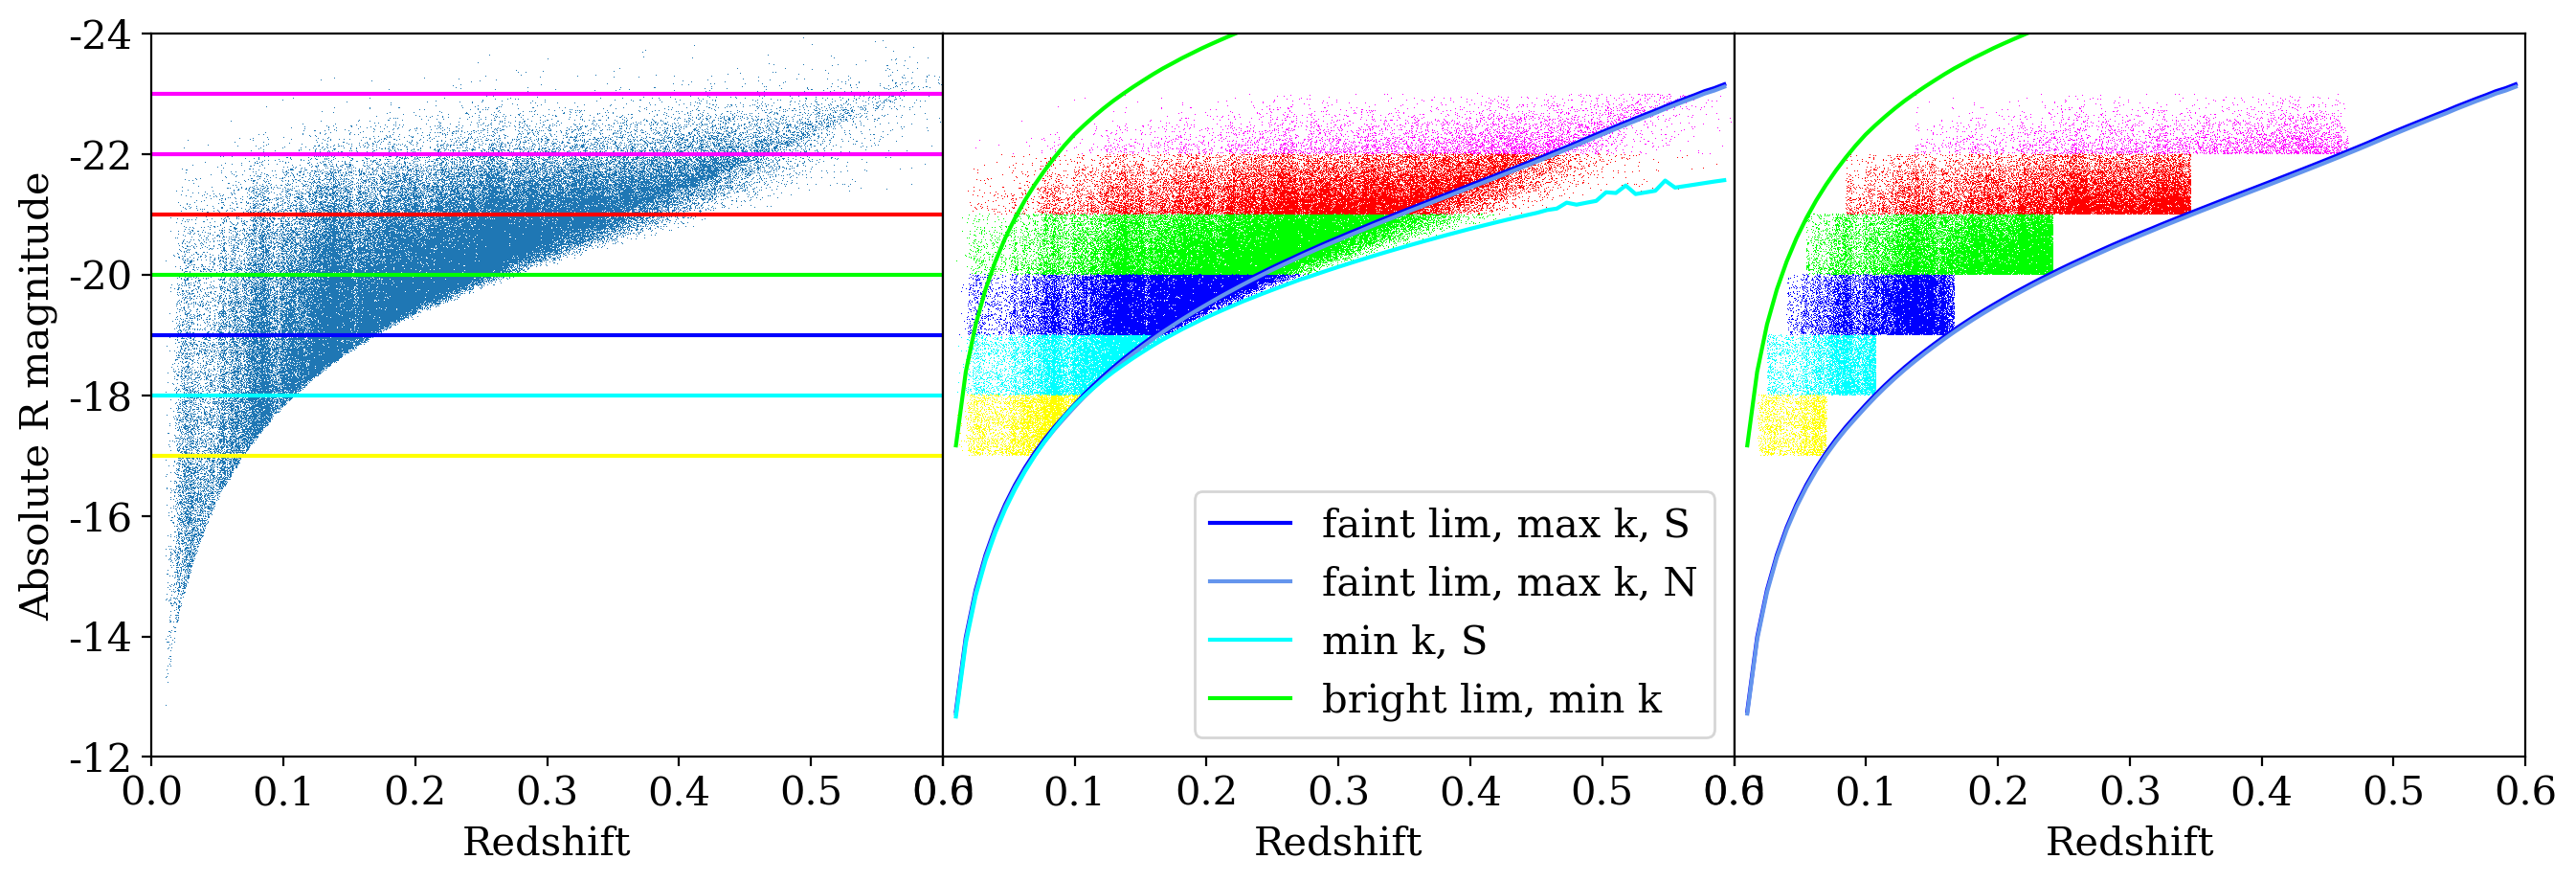

In [16]:
plt.figure(figsize=(16,5), dpi=200)
ax1 = plt.subplot(131)
ax1.plot(data['Z'], -data['ABSMAG_R'], lw=0, marker=',')
ax1.plot([0,0.6],[17,17], color='yellow')
ax1.plot([0,0.6],[18,18], color='cyan')
ax1.plot([0,0.6],[19,19], color='blue')
ax1.plot([0,0.6],[20,20], color='lime')
ax1.plot([0,0.6],[21,21], color='red')
ax1.plot([0,0.6],[22,22], color='magenta')
ax1.plot([0,0.6],[23,23], color='magenta')
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.yticks([12,14,16,18,20,22,24],['-12','-14','-16','-18','-20','-22','-24'])
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude')

ax2 = plt.subplot(132)
ax2.plot(data['Z'][absmag_lim(-17,-18, data)], -data['ABSMAG_R'][absmag_lim(-17,-18, data)], lw=0, marker=',', color='yellow')
ax2.plot(data['Z'][absmag_lim(-18,-19, data)], -data['ABSMAG_R'][absmag_lim(-18,-19, data)], lw=0, marker=',', color='cyan')
ax2.plot(data['Z'][absmag_lim(-19,-20, data)], -data['ABSMAG_R'][absmag_lim(-19,-20, data)], lw=0, marker=',', color='blue')
ax2.plot(data['Z'][absmag_lim(-20,-21, data)], -data['ABSMAG_R'][absmag_lim(-20,-21, data)], lw=0, marker=',', color='lime')
ax2.plot(data['Z'][absmag_lim(-21,-22, data)], -data['ABSMAG_R'][absmag_lim(-21,-22, data)], lw=0, marker=',', color='red')
ax2.plot(data['Z'][absmag_lim(-22,-23, data)], -data['ABSMAG_R'][absmag_lim(-22,-23, data)], lw=0, marker=',', color='magenta')
#ax2.plot(zmax_range, -M_range, color='tab:blue', lw=1, label='my estimate')
ax2.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax2.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_med, color='lime', label='med k, S')

plt.plot(z_range[0:-1], -faintlim_range_S_min, color='aqua', label='min k, S')
#plt.plot(z_range[0:-1], -brightlim_range_max, color='blue', label='bright lim, max k')
ax2.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
#plt.plot(z_range[0:-1], -brightlim_range_med, color='aqua', label='bright lim, med k')

#ax2.plot(data['ZMAX'], -data['ABSMAG_R'], lw=0, marker=',', color='orange')


plt.legend()
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.xlabel('Redshift')

sample1718 = np.intersect1d(absmag_lim(-17,-18, data), redshift_lim_from_k(-17,-18, data)[1])
sample1819 = np.intersect1d(absmag_lim(-18,-19, data), redshift_lim_from_k(-18,-19, data)[1])
sample1920 = np.intersect1d(absmag_lim(-19,-20, data), redshift_lim_from_k(-19,-20, data)[1])
sample2021 = np.intersect1d(absmag_lim(-20,-21, data), redshift_lim_from_k(-20,-21, data)[1])
sample2122 = np.intersect1d(absmag_lim(-21,-22, data), redshift_lim_from_k(-21,-22, data)[1])
sample2223 = np.intersect1d(absmag_lim(-22,-23, data), redshift_lim_from_k(-22,-23, data)[1])

ax3 = plt.subplot(133)
ax3.plot(data['Z'][sample1718], -data['ABSMAG_R'][sample1718], lw=0, marker=',', color='yellow')
ax3.plot(data['Z'][sample1819], -data['ABSMAG_R'][sample1819], lw=0, marker=',', color='cyan')
ax3.plot(data['Z'][sample1920], -data['ABSMAG_R'][sample1920], lw=0, marker=',', color='blue')
ax3.plot(data['Z'][sample2021], -data['ABSMAG_R'][sample2021], lw=0, marker=',', color='lime')
ax3.plot(data['Z'][sample2122], -data['ABSMAG_R'][sample2122], lw=0, marker=',', color='red')
ax3.plot(data['Z'][sample2223], -data['ABSMAG_R'][sample2223], lw=0, marker=',', color='magenta')
ax3.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax3.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
ax3.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)

plt.xlabel('Redshift')
plt.subplots_adjust(wspace=0)
plt.savefig('../figures/week8/sv3_bright_mag_v_redshift.png')


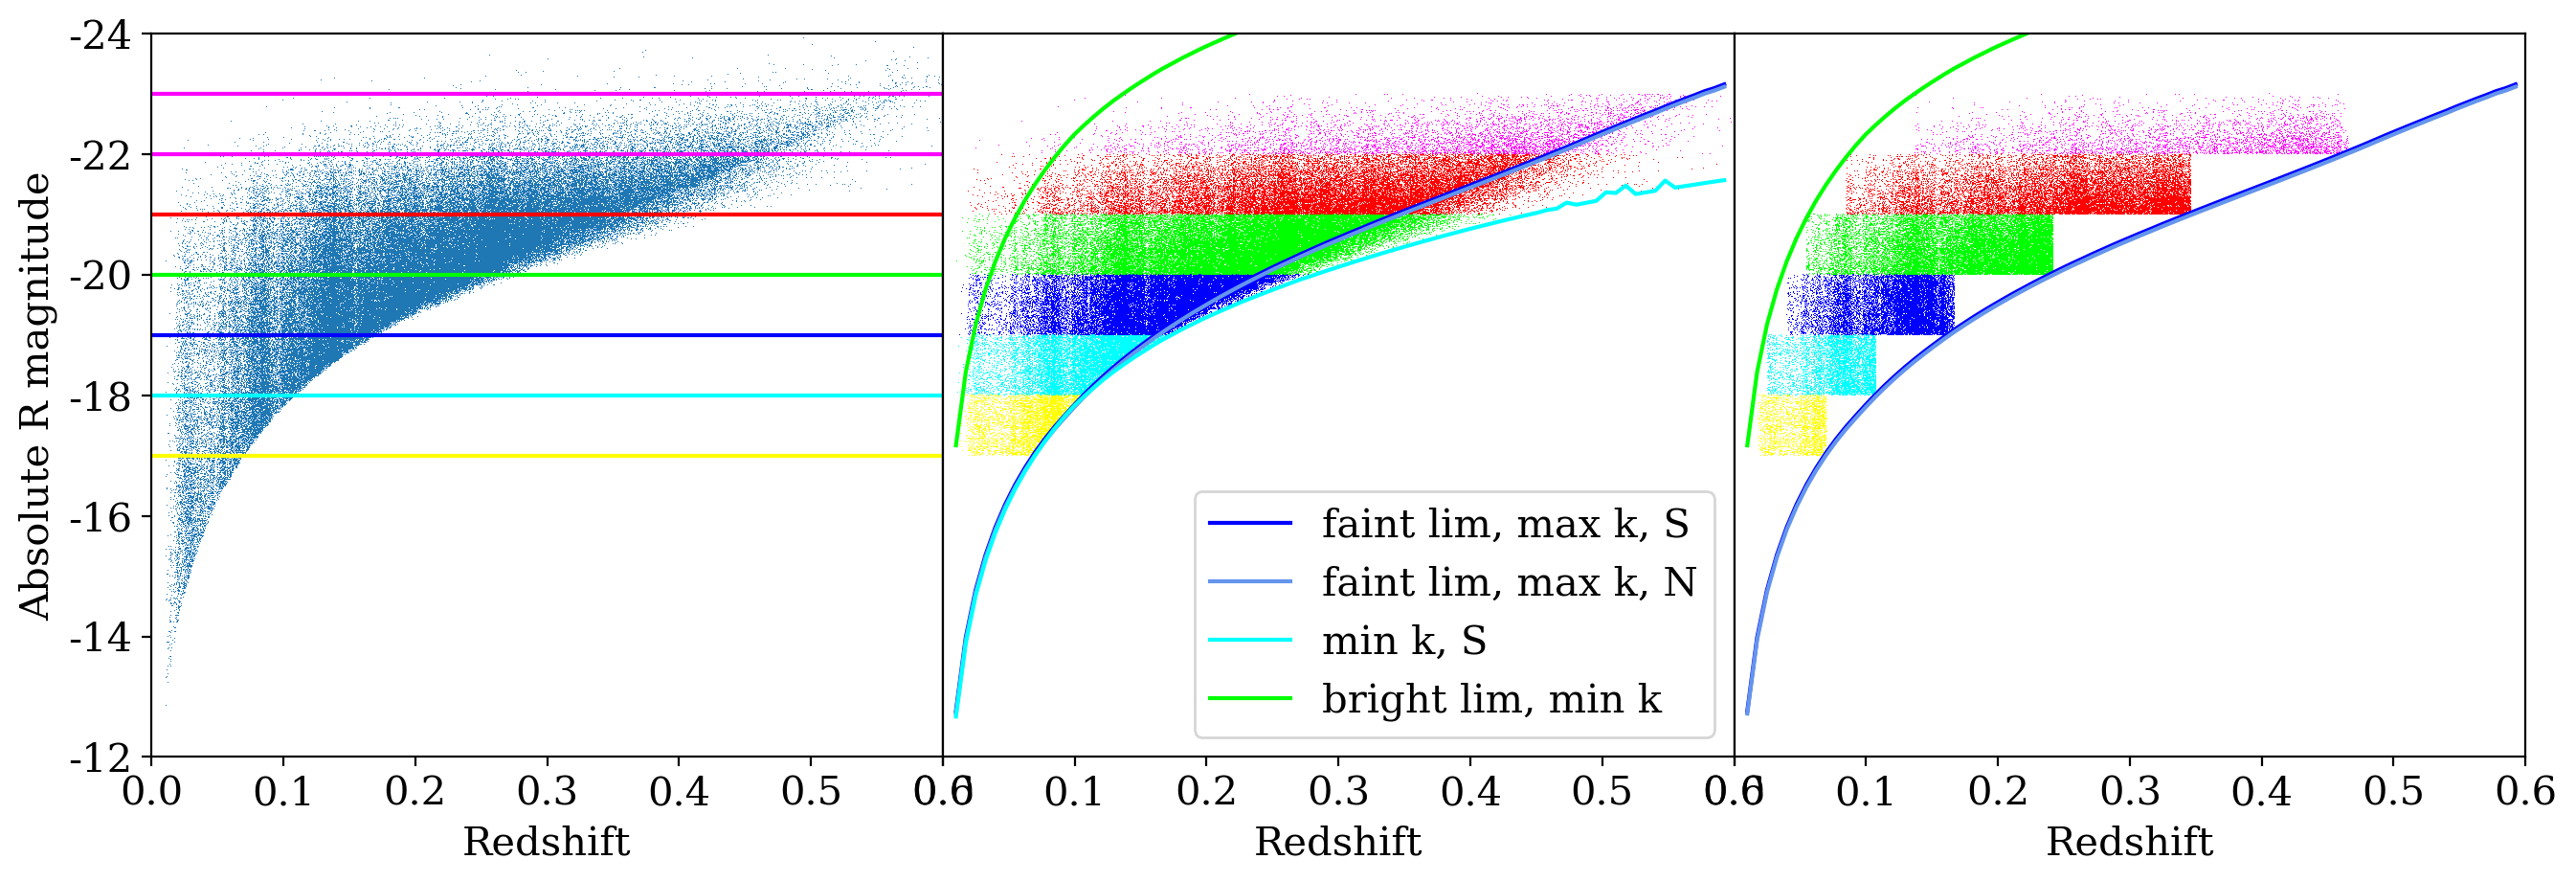

In [17]:
plt.figure(figsize=(16,5), dpi=200)
ax1 = plt.subplot(131)
ax1.plot(ran['Z'], -ran['ABSMAG_R'], lw=0, marker=',')
ax1.plot([0,0.6],[17,17], color='yellow')
ax1.plot([0,0.6],[18,18], color='cyan')
ax1.plot([0,0.6],[19,19], color='blue')
ax1.plot([0,0.6],[20,20], color='lime')
ax1.plot([0,0.6],[21,21], color='red')
ax1.plot([0,0.6],[22,22], color='magenta')
ax1.plot([0,0.6],[23,23], color='magenta')
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.yticks([12,14,16,18,20,22,24],['-12','-14','-16','-18','-20','-22','-24'])
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude')

ax2 = plt.subplot(132)
ax2.plot(ran['Z'][absmag_lim(-17,-18, ran)], -ran['ABSMAG_R'][absmag_lim(-17,-18, ran)], lw=0, marker=',', color='yellow')
ax2.plot(ran['Z'][absmag_lim(-18,-19, ran)], -ran['ABSMAG_R'][absmag_lim(-18,-19, ran)], lw=0, marker=',', color='cyan')
ax2.plot(ran['Z'][absmag_lim(-19,-20, ran)], -ran['ABSMAG_R'][absmag_lim(-19,-20, ran)], lw=0, marker=',', color='blue')
ax2.plot(ran['Z'][absmag_lim(-20,-21, ran)], -ran['ABSMAG_R'][absmag_lim(-20,-21, ran)], lw=0, marker=',', color='lime')
ax2.plot(ran['Z'][absmag_lim(-21,-22, ran)], -ran['ABSMAG_R'][absmag_lim(-21,-22, ran)], lw=0, marker=',', color='red')
ax2.plot(ran['Z'][absmag_lim(-22,-23, ran)], -ran['ABSMAG_R'][absmag_lim(-22,-23, ran)], lw=0, marker=',', color='magenta')
#ax2.plot(zmax_range, -M_range, color='tab:blue', lw=1, label='my estimate')
ax2.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax2.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_med, color='lime', label='med k, S')

plt.plot(z_range[0:-1], -faintlim_range_S_min, color='aqua', label='min k, S')
#plt.plot(z_range[0:-1], -brightlim_range_max, color='blue', label='bright lim, max k')
ax2.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
#plt.plot(z_range[0:-1], -brightlim_range_med, color='aqua', label='bright lim, med k')

#ax2.plot(ran['ZMAX'], -ran['ABSMAG_R'], lw=0, marker=',', color='orange')


plt.legend()
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.xlabel('Redshift')

ran_sample1718 = np.intersect1d(absmag_lim(-17,-18, ran), redshift_lim_from_k(-17,-18, ran)[1])
ran_sample1819 = np.intersect1d(absmag_lim(-18,-19, ran), redshift_lim_from_k(-18,-19, ran)[1])
ran_sample1920 = np.intersect1d(absmag_lim(-19,-20, ran), redshift_lim_from_k(-19,-20, ran)[1])
ran_sample2021 = np.intersect1d(absmag_lim(-20,-21, ran), redshift_lim_from_k(-20,-21, ran)[1])
ran_sample2122 = np.intersect1d(absmag_lim(-21,-22, ran), redshift_lim_from_k(-21,-22, ran)[1])
ran_sample2223 = np.intersect1d(absmag_lim(-22,-23, ran), redshift_lim_from_k(-22,-23, ran)[1])

ax3 = plt.subplot(133)
ax3.plot(ran['Z'][ran_sample1718], -ran['ABSMAG_R'][ran_sample1718], lw=0, marker=',', color='yellow')
ax3.plot(ran['Z'][ran_sample1819], -ran['ABSMAG_R'][ran_sample1819], lw=0, marker=',', color='cyan')
ax3.plot(ran['Z'][ran_sample1920], -ran['ABSMAG_R'][ran_sample1920], lw=0, marker=',', color='blue')
ax3.plot(ran['Z'][ran_sample2021], -ran['ABSMAG_R'][ran_sample2021], lw=0, marker=',', color='lime')
ax3.plot(ran['Z'][ran_sample2122], -ran['ABSMAG_R'][ran_sample2122], lw=0, marker=',', color='red')
ax3.plot(ran['Z'][ran_sample2223], -ran['ABSMAG_R'][ran_sample2223], lw=0, marker=',', color='magenta')
ax3.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax3.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
ax3.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)

plt.xlabel('Redshift')
plt.subplots_adjust(wspace=0)
plt.savefig('../figures/week10/sv3_ran_bright_mag_v_redshift.png')


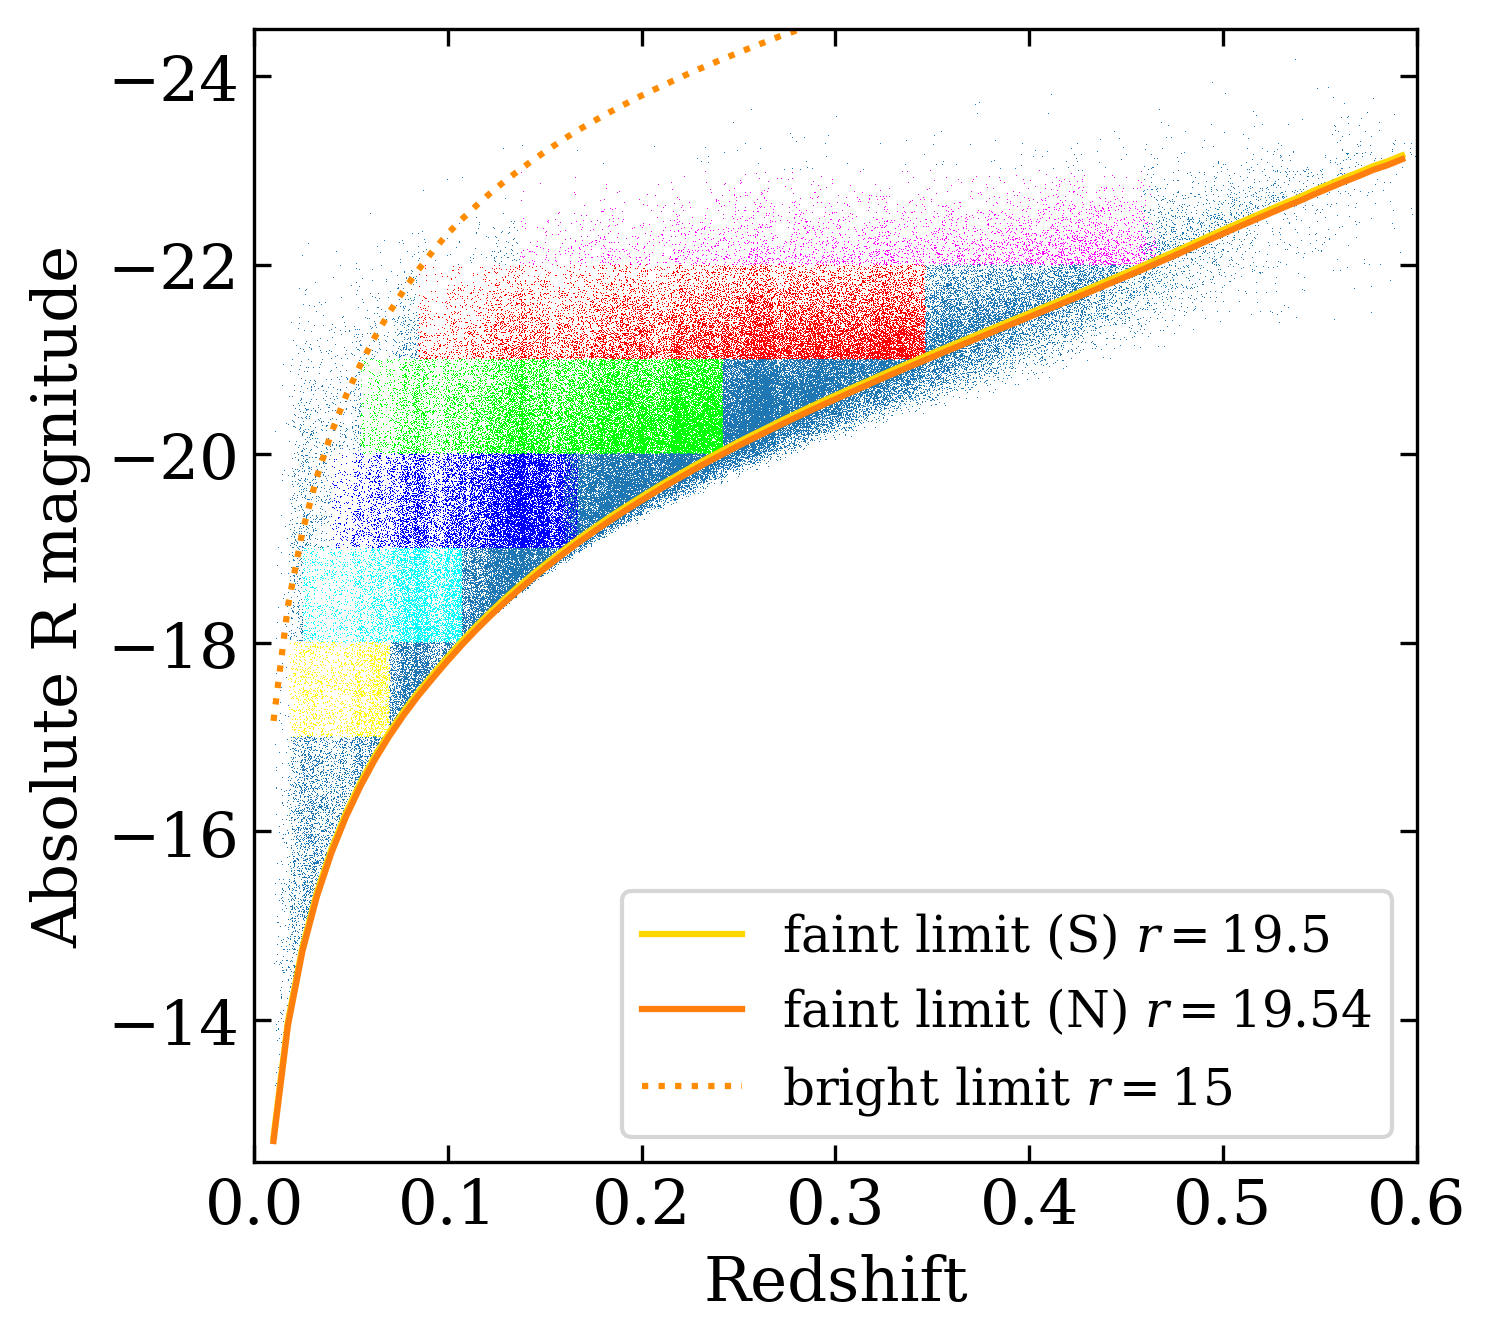

In [26]:
fig, ax1 = plt.subplots(figsize=(5,5), dpi=300)

ax1.plot(data['Z'], data['ABSMAG_R'], lw=0, marker=',')

plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude')

ax1.plot(data['Z'][sample1718], data['ABSMAG_R'][sample1718], lw=0, marker=',', color='yellow')
ax1.plot(data['Z'][sample1819], data['ABSMAG_R'][sample1819], lw=0, marker=',', color='cyan')
ax1.plot(data['Z'][sample1920], data['ABSMAG_R'][sample1920], lw=0, marker=',', color='blue')
ax1.plot(data['Z'][sample2021], data['ABSMAG_R'][sample2021], lw=0, marker=',', color='lime')
ax1.plot(data['Z'][sample2122], data['ABSMAG_R'][sample2122], lw=0, marker=',', color='red')
ax1.plot(data['Z'][sample2223], data['ABSMAG_R'][sample2223], lw=0, marker=',', color='magenta')
ax1.plot(z_range[0:-1], faintlim_range_S_max, color='gold', ls ='-', label='faint limit (S) $r=19.5$')
ax1.plot(z_range[0:-1], faintlim_range_N_max, color='tab:orange', ls='-', label='faint limit (N) $r=19.5$4')
ax1.plot(z_range[0:-1], brightlim_range_min, color='darkorange', ls=':', label='bright limit $r=15$')

plt.ylim(-24.5,-12.5)
plt.xlim(0,0.6)
ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.gca().invert_yaxis()
plt.xlabel('Redshift')
plt.legend(loc='lower right', fontsize=12)

plt.savefig('../figures/interim/sv3_vol_lim_samples.png', bbox_inches='tight')


In [ ]:
print(sample1718)
print(ran_sample1718)

Luminosity function

In [ ]:
def phi(M, phi_star=8.32*10**(-3), M_star=-20.3, alpha=-0.23): #luminosity function
    return np.log(10)*phi_star*10**(0.4*(alpha+1)*(-M+M_star))*np.exp(-10**(0.4*(-M+M_star)))/2.5

with open('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/BGS_BRIGHT_N_nz.txt') as file:
    print('N')
    print(file.read())

with open('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/BGS_BRIGHT_S_nz.txt') as file:
    print('S')
    print(file.read())

In [ ]:
import numpy as np
A = 86.2884+87.204
sky_area = 4*np.pi*np.rad2deg(1)**2
print(sky_area)
fsky_hdr = A/sky_area
print(fsky_hdr)

In [ ]:
zmax_clipped = np.clip(data['ZMAX'], a_min=None, a_max=0.3)
data['VMAX'] = fsky_hdr*cosmo.comoving_volume(zmax_clipped)
print(data['ZMAX'])

In [ ]:
phi_star_est = 0.00000000003
M_star_est = -22 #-21.5#-19.7+5*np.log10(5) for b-band
alpha_est = -1.25 #-1.07
M_range = np.arange(-23,-16,0.1)
redshift_cut = np.where(data['Z'] <= 0.3)[0]

plt.figure(figsize=(12,5),dpi=200)
ax1 = plt.subplot(121)
ax1.hist(data['ABSMAG_R'][redshift_cut], bins=M_range)
ax1.set_yscale('log')
plt.xlabel('abs R mag')
plt.ylabel('number')
plt.xlim(-24,-12)
ax2 = plt.subplot(122)
ax2.set_yscale('log')
ax2.hist(data['ABSMAG_R'][redshift_cut], bins=M_range, weights=1/data['VMAX'][redshift_cut], histtype='step')
#ax2.plot(M_range, phi(M_range, phi_star=0.000000000015, M_star=-20, alpha=-1.02))
ax2.plot(M_range, phi(M_range, phi_star=10**(-2.03), M_star=-20.7, alpha=-1.25), color='tab:olive')
plt.xlabel('abs R mag, weighted by vmax')
plt.ylim(10**-7,10**-1)
plt.xlim(-26,-12)
plt.savefig('../figures/week9/sv3_LF.png')

v/vmax plot?

In [ ]:
def vmax(lim0, lim1, cat):
    r1 = cosmo.comoving_distance(redshift_lim_from_k(lim0,lim1,cat)[0][1])
    z2_N = redshift_lim_from_k(lim0,lim1,cat)[0][0][0]
    z2_S = redshift_lim_from_k(lim0,lim1,cat)[0][0][1]
    r2_N = cosmo.comoving_distance(z2_N)
    r2_S = cosmo.comoving_distance(z2_S)
    plt.scatter([z2_N,z2_S], [1,1])
    print(z2_N, z2_S)
    v_N = (4/3)*np.pi*fsky_hdr*(r2_N**3-r1**3).to_value()
    v_S = (4/3)*np.pi*fsky_hdr*(r2_S**3-r1**3).to_value()
    return [v_N,v_S] #Mpc**3/h

def v(lim0, lim1, z2, cat):
    r1 = cosmo.comoving_distance(redshift_lim_from_k(lim0,lim1,cat)[0][1])
    r2 = cosmo.comoving_distance(z2)
    return (4/3)*np.pi*fsky_hdr*(r2**3-r1**3).to_value()


print(redshift_lim_from_k(-22,-23,data)[0]) #[[N,S upper], lower]
print(redshift_lim_from_k(-20,-21,data)[0][0][1])

In [ ]:
plt.figure()
data_magbins_N = Table()
data_magbins_N['TARGETID'] = N['TARGETID']
data_magbins_N['Z'] = N['Z']
data_magbins_N['ABSMAG_R'] = N['ABSMAG_R']
data_magbins_N['WEIGHT'] = N['WEIGHT']
data_magbins_N['Vmax1718'] = vmax(-17,-18, data)[0]
data_magbins_N['Vmax1819'] = vmax(-18,-19, data)[0]
data_magbins_N['Vmax1920'] = vmax(-19,-20, data)[0]
data_magbins_N['Vmax2021'] = vmax(-20,-21, data)[0]
data_magbins_N['Vmax2122'] = vmax(-21,-22, data)[0]
data_magbins_N['Vmax2223'] = vmax(-22,-23, data)[0]
print('')
data_magbins_S = Table()
data_magbins_S['TARGETID'] = S['TARGETID']
data_magbins_S['Z'] = S['Z']
data_magbins_S['ABSMAG_R'] = S['ABSMAG_R']
data_magbins_S['WEIGHT'] = S['WEIGHT']
data_magbins_S['Vmax1718'] = vmax(-17,-18, data)[1]
data_magbins_S['Vmax1819'] = vmax(-18,-19, data)[1]
data_magbins_S['Vmax1920'] = vmax(-19,-20, data)[1]
data_magbins_S['Vmax2021'] = vmax(-20,-21, data)[1]
data_magbins_S['Vmax2122'] = vmax(-21,-22, data)[1]
data_magbins_S['Vmax2223'] = vmax(-22,-23, data)[1]
plt.xlim(0,0.6)
plt.show()

In [ ]:
plt.figure()
ran_magbins_N = Table()
ran_magbins_N['TARGETID'] = N8['TARGETID']
ran_magbins_N['Z'] = N8['Z']
ran_magbins_N['ABSMAG_R'] = N8['ABSMAG_R']
ran_magbins_N['WEIGHT'] = N8['WEIGHT']
ran_magbins_N['Vmax1718'] = vmax(-17,-18, ran)[0]
ran_magbins_N['Vmax1819'] = vmax(-18,-19, ran)[0]
ran_magbins_N['Vmax1920'] = vmax(-19,-20, ran)[0]
ran_magbins_N['Vmax2021'] = vmax(-20,-21, ran)[0]
ran_magbins_N['Vmax2122'] = vmax(-21,-22, ran)[0]
ran_magbins_N['Vmax2223'] = vmax(-22,-23, ran)[0]
print('')
ran_magbins_S = Table()
ran_magbins_S['TARGETID'] = S8['TARGETID']
ran_magbins_S['Z'] = S8['Z']
ran_magbins_S['ABSMAG_R'] = S8['ABSMAG_R']
ran_magbins_S['WEIGHT'] = S8['WEIGHT']
ran_magbins_S['Vmax1718'] = vmax(-17,-18, ran)[1]
ran_magbins_S['Vmax1819'] = vmax(-18,-19, ran)[1]
ran_magbins_S['Vmax1920'] = vmax(-19,-20, ran)[1]
ran_magbins_S['Vmax2021'] = vmax(-20,-21, ran)[1]
ran_magbins_S['Vmax2122'] = vmax(-21,-22, ran)[1]
ran_magbins_S['Vmax2223'] = vmax(-22,-23, ran)[1]
plt.xlim(0,0.6)
plt.show()

In [ ]:
data_magbins = Table(np.hstack((data_magbins_N, data_magbins_S)))

In [ ]:
ran_magbins = Table(np.hstack((ran_magbins_N, ran_magbins_S)))

In [ ]:
data_magbins

In [ ]:
ran_magbins

In [ ]:
data_magbins_1718 = data_magbins[sample1718]
data_magbins_1718['V1718'] = v(-17,-18,data_magbins_1718['Z'], data) 
data_magbins_1819 = data_magbins[sample1819]
data_magbins_1819['V1819'] = v(-18,-19,data_magbins_1819['Z'], data) 
data_magbins_1920 = data_magbins[sample1920]
data_magbins_1920['V1920'] = v(-19,-20,data_magbins_1920['Z'], data) 
data_magbins_2021 = data_magbins[sample2021]
data_magbins_2021['V2021'] = v(-20,-21,data_magbins_2021['Z'], data) 
data_magbins_2122 = data_magbins[sample2122]
data_magbins_2122['V2122'] = v(-21,-22,data_magbins_2122['Z'], data) 
data_magbins_2223 = data_magbins[sample2223]
data_magbins_2223['V2223'] = v(-22,-23,data_magbins_2223['Z'], data) 

In [ ]:
ran_magbins_1718 = ran_magbins[ran_sample1718]
ran_magbins_1718['V1718'] = v(-17,-18,ran_magbins_1718['Z'], ran) 
ran_magbins_1819 = ran_magbins[ran_sample1819]
ran_magbins_1819['V1819'] = v(-18,-19,ran_magbins_1819['Z'], ran) 
ran_magbins_1920 = ran_magbins[ran_sample1920]
ran_magbins_1920['V1920'] = v(-19,-20,ran_magbins_1920['Z'], ran) 
ran_magbins_2021 = ran_magbins[ran_sample2021]
ran_magbins_2021['V2021'] = v(-20,-21,ran_magbins_2021['Z'], ran) 
ran_magbins_2122 = ran_magbins[ran_sample2122]
ran_magbins_2122['V2122'] = v(-21,-22,ran_magbins_2122['Z'], ran) 
ran_magbins_2223 = ran_magbins[ran_sample2223]
ran_magbins_2223['V2223'] = v(-22,-23,ran_magbins_2223['Z'], ran) 

In [ ]:
plt.figure(figsize=(7,5),dpi=150)
plt.plot(data_magbins_1718['Z'], -data_magbins_1718['ABSMAG_R'], lw=0, marker=',')
plt.plot(data_magbins_1819['Z'], -data_magbins_1819['ABSMAG_R'], lw=0, marker=',')
plt.plot(data_magbins_1920['Z'], -data_magbins_1920['ABSMAG_R'], lw=0, marker=',')
plt.plot(data_magbins_2021['Z'], -data_magbins_2021['ABSMAG_R'], lw=0, marker=',')
plt.plot(data_magbins_2122['Z'], -data_magbins_2122['ABSMAG_R'], lw=0, marker=',')
plt.plot(data_magbins_2223['Z'], -data_magbins_2223['ABSMAG_R'], lw=0, marker=',')
plt.show()

In [ ]:
plt.figure(figsize=(7,5),dpi=150)
plt.plot(ran_magbins_1718['Z'], -ran_magbins_1718['ABSMAG_R'], lw=0, marker=',')
plt.plot(ran_magbins_1819['Z'], -ran_magbins_1819['ABSMAG_R'], lw=0, marker=',')
plt.plot(ran_magbins_1920['Z'], -ran_magbins_1920['ABSMAG_R'], lw=0, marker=',')
plt.plot(ran_magbins_2021['Z'], -ran_magbins_2021['ABSMAG_R'], lw=0, marker=',')
plt.plot(ran_magbins_2122['Z'], -ran_magbins_2122['ABSMAG_R'], lw=0, marker=',')
plt.plot(ran_magbins_2223['Z'], -ran_magbins_2223['ABSMAG_R'], lw=0, marker=',')
plt.show()

In [ ]:
plt.figure(figsize=(10,5),dpi=150)
ax1 = plt.subplot(231)
ax1.hist(data_magbins_1718['V1718']/data_magbins_1718['Vmax1718'], bins=50)
#ax1.set_yscale('log')


ax2 = plt.subplot(232)
ax2.hist(data_magbins_1819['V1819']/data_magbins_1819['Vmax1819'], bins=50)
#ax2.set_yscale('log')


ax3 = plt.subplot(233)
ax3.hist(data_magbins_1920['V1920']/data_magbins_1920['Vmax1920'], bins=50)
#ax3.set_yscale('log')


ax4 = plt.subplot(234)
ax4.hist(data_magbins_2021['V2021']/data_magbins_2021['Vmax2021'], bins=50)
#ax4.set_yscale('log')


ax5 = plt.subplot(235)
ax5.hist(data_magbins_2122['V2122']/data_magbins_2122['Vmax2122'], bins=50)
#ax5.set_yscale('log')


ax6 = plt.subplot(236)
ax6.hist(data_magbins_2223['V2223']/data_magbins_2223['Vmax2223'], bins=50)
#ax6.set_yscale('log')


plt.savefig('../figures/week9/sv3_v_vmax_raw.png')

In [ ]:
plt.figure(figsize=(10,5),dpi=150)
ax1 = plt.subplot(231)
ax1.hist(data_magbins_1718['V1718']/data_magbins_1718['Vmax1718'], weights=data_magbins_1718['WEIGHT'], bins=50)
#ax1.set_yscale('log')


ax2 = plt.subplot(232)
ax2.hist(data_magbins_1819['V1819']/data_magbins_1819['Vmax1819'], weights=data_magbins_1819['WEIGHT'], bins=50)
#ax2.set_yscale('log')


ax3 = plt.subplot(233)
ax3.hist(data_magbins_1920['V1920']/data_magbins_1920['Vmax1920'], weights=data_magbins_1920['WEIGHT'], bins=50)
#ax3.set_yscale('log')


ax4 = plt.subplot(234)
ax4.hist(data_magbins_2021['V2021']/data_magbins_2021['Vmax2021'], weights=data_magbins_2021['WEIGHT'], bins=50)
#ax4.set_yscale('log')


ax5 = plt.subplot(235)
ax5.hist(data_magbins_2122['V2122']/data_magbins_2122['Vmax2122'], weights=data_magbins_2122['WEIGHT'], bins=50)
#ax5.set_yscale('log')


ax6 = plt.subplot(236)
ax6.hist(data_magbins_2223['V2223']/data_magbins_2223['Vmax2223'], weights=data_magbins_2223['WEIGHT'], bins=50)
#ax6.set_yscale('log')

plt.savefig('../figures/week9/sv3_v_vmax_weighted.png')

In [ ]:
plt.figure(figsize=(10,5),dpi=150)
ax1 = plt.subplot(231)
plt.title(' -17 > M > -18')
hist_17_18 = ax1.hist(data_magbins_1718['V1718']/data_magbins_1718['Vmax1718'], weights=data_magbins_1718['WEIGHT'], bins=50, label='weighted')
"""yerr_1718 = np.sqrt(1/hist_1718[0])
print(np.shape(hist_1718[1]),np.shape(hist_1718[0]))
ax1.errorbar(hist_1718[1][1:],hist_1718[0], yerr=yerr_1718, lw=0, elinewidth=5, label='error')"""
ax1.hist(data_magbins_1718['V1718']/data_magbins_1718['Vmax1718'], bins=50, alpha=0.9, label='unweighted')
#ax1.set_yscale('log')
plt.legend()

ax2 = plt.subplot(232)
plt.title(' -18 > M > -19')
ax2.hist(data_magbins_1819['V1819']/data_magbins_1819['Vmax1819'], weights=data_magbins_1819['WEIGHT'], bins=50)
ax2.hist(data_magbins_1819['V1819']/data_magbins_1819['Vmax1819'], bins=50, alpha=0.9)
#ax2.set_yscale('log')


ax3 = plt.subplot(233)
plt.title(' -19 > M > -20')
ax3.hist(data_magbins_1920['V1920']/data_magbins_1920['Vmax1920'], weights=data_magbins_1920['WEIGHT'], bins=50)
ax3.hist(data_magbins_1920['V1920']/data_magbins_1920['Vmax1920'], bins=50, alpha=0.9)
#ax3.set_yscale('log')


ax4 = plt.subplot(234)
plt.title(' -20 > M > -21')
ax4.hist(data_magbins_2021['V2021']/data_magbins_2021['Vmax2021'], weights=data_magbins_2021['WEIGHT'], bins=50)
ax4.hist(data_magbins_2021['V2021']/data_magbins_2021['Vmax2021'], bins=50, alpha=0.9)
#ax4.set_yscale('log')


ax5 = plt.subplot(235)
plt.title(' -21 > M > -22')
ax5.hist(data_magbins_2122['V2122']/data_magbins_2122['Vmax2122'], weights=data_magbins_2122['WEIGHT'], bins=50)
ax5.hist(data_magbins_2122['V2122']/data_magbins_2122['Vmax2122'], bins=50, alpha=0.9)
plt.xlabel('v/v_max')
#ax5.set_yscale('log')


ax6 = plt.subplot(236)
plt.title(' -22 > M > -23')
ax6.hist(data_magbins_2223['V2223']/data_magbins_2223['Vmax2223'], weights=data_magbins_2223['WEIGHT'], bins=50)
ax6.hist(data_magbins_2223['V2223']/data_magbins_2223['Vmax2223'], bins=50, alpha=0.9)
#ax6.set_yscale('log')

plt.subplots_adjust(hspace=0.3)
plt.savefig('../figures/week10/sv3_v_vmax_combined.png')

In [ ]:
plt.figure(figsize=(10,5),dpi=150)
ax1 = plt.subplot(231)
plt.title(' -17 > M > -18')
hist_17_18 = ax1.hist(ran_magbins_1718['V1718']/ran_magbins_1718['Vmax1718'], weights=ran_magbins_1718['WEIGHT'], bins=50, label='weighted')
ax1.hist(ran_magbins_1718['V1718']/ran_magbins_1718['Vmax1718'], bins=50, alpha=0.9, label='unweighted')
#ax1.set_yscale('log')
plt.legend()

ax2 = plt.subplot(232)
plt.title(' -18 > M > -19')
ax2.hist(ran_magbins_1819['V1819']/ran_magbins_1819['Vmax1819'], weights=ran_magbins_1819['WEIGHT'], bins=50)
ax2.hist(ran_magbins_1819['V1819']/ran_magbins_1819['Vmax1819'], bins=50, alpha=0.9)
#ax2.set_yscale('log')


ax3 = plt.subplot(233)
plt.title(' -19 > M > -20')
ax3.hist(ran_magbins_1920['V1920']/ran_magbins_1920['Vmax1920'], weights=ran_magbins_1920['WEIGHT'], bins=50)
ax3.hist(ran_magbins_1920['V1920']/ran_magbins_1920['Vmax1920'], bins=50, alpha=0.9)
#ax3.set_yscale('log')


ax4 = plt.subplot(234)
plt.title(' -20 > M > -21')
ax4.hist(ran_magbins_2021['V2021']/ran_magbins_2021['Vmax2021'], weights=ran_magbins_2021['WEIGHT'], bins=50)
ax4.hist(ran_magbins_2021['V2021']/ran_magbins_2021['Vmax2021'], bins=50, alpha=0.9)
#ax4.set_yscale('log')


ax5 = plt.subplot(235)
plt.title(' -21 > M > -22')
ax5.hist(ran_magbins_2122['V2122']/ran_magbins_2122['Vmax2122'], weights=ran_magbins_2122['WEIGHT'], bins=50)
ax5.hist(ran_magbins_2122['V2122']/ran_magbins_2122['Vmax2122'], bins=50, alpha=0.9)
plt.xlabel('v/v_max')
#ax5.set_yscale('log')


ax6 = plt.subplot(236)
plt.title(' -22 > M > -23')
ax6.hist(ran_magbins_2223['V2223']/ran_magbins_2223['Vmax2223'], weights=ran_magbins_2223['WEIGHT'], bins=50)
ax6.hist(ran_magbins_2223['V2223']/ran_magbins_2223['Vmax2223'], bins=50, alpha=0.9)
#ax6.set_yscale('log')

plt.subplots_adjust(hspace=0.3)
plt.savefig('../figures/week10/sv3_ran_v_vmax_combined.png')